In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

# Quantization results

Specifications:
    * layers: pool2(single output), fc6(two outputs)
    * 2, 4, 6, 8 bits
    * 60 images belonging to 20 classes from pascal voc 2007 dataset

In [2]:
quanDir = '0Loss'
quanList = os.listdir(quanDir)
# quanList

In [3]:
fc6 = quanList[:4]
fc6 = [os.path.join(quanDir, i) for i in fc6]

pool2 = quanList[4:]
pool2 = [os.path.join(quanDir, i) for i in pool2]

In [4]:
fc6Data = []
for i in fc6:
    a = np.load(i)
    fc6Data.append(a[0, -1])
fc6Data.insert(0, 0)
# fc6Data

In [5]:
pool2Data = []
for i in pool2:
    a = np.load(i)
    pool2Data.append(a[0, -1])
pool2Data.insert(0, 0)
# pool2Data

Text(0,0.5,'Mean average precision')

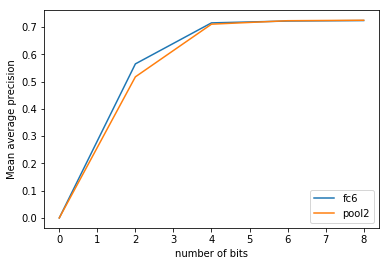

In [6]:
bitRange = np.array([0, 2, 4, 6, 8])
plt.plot(bitRange, np.array(fc6Data), label='fc6')
plt.plot(bitRange, np.array(pool2Data), label='pool2')
plt.legend(loc='lower right')
plt.xlabel('number of bits')
plt.ylabel('Mean average precision')

# Channel effects

Specifications:
    * loss: 10, 30 percent
    * burst length: 1,2,3,4, 5
    * layer: pool2
    * 60 images belonging to 20 classes from pascal voc 2007 dataset

In [7]:
lossDir = os.listdir('.')
lossDir = lossDir[2:-2]
# lossDir

In [8]:
tenLoss = lossDir[:5]
tenfiles = [os.listdir(i) for i in tenLoss]
tenfiles = np.array(tenfiles)
tenfiles = list(np.squeeze(tenfiles, axis=-1))

tenfiles = [os.path.join(i, j) for i, j in zip(tenLoss, tenfiles)]
# tenfiles

In [9]:
tenLossData = []
for i in tenfiles:
    a = np.load(i)
    tenLossData.append(np.mean(a, axis=0)[-1])
tenLossData.insert(0, 0.7245409317257508)
# tenLossData

In [10]:
thirtyLoss = lossDir[5:]
thirtyFiles = [os.listdir(i) for i in tenLoss]
thirtyFiles = np.array(thirtyFiles)
thirtyFiles = list(np.squeeze(thirtyFiles, axis=-1))

thirtyFiles = [os.path.join(i, j) for i, j in zip(thirtyLoss, thirtyFiles)]
# thirtyFiles

In [11]:
thirtyLossData = []
for i in thirtyFiles:
    a = np.load(i)
    thirtyLossData.append(np.mean(a, axis=0)[-1])
thirtyLossData.insert(0, 0.7245409317257508)
# thirtyLossData

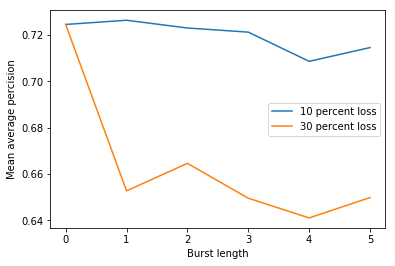

In [12]:
xLabels = np.array([0,1,2,3,4,5])
plt.plot(xLabels, tenLossData, label='10 percent loss')
plt.plot(xLabels, thirtyLossData, label='30 percent loss')
plt.xlabel('Burst length')
plt.ylabel('Mean average percision')
plt.legend(loc='right')